# Lab 1 Analysis Example using Thicket

In [211]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [212]:
tk = th.Thicket.from_caliperreader(glob("cali_files/cuda_cali/*s2.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)
#tk.dataframe = tk.dataframe.drop(["spot.channel", "Total time"], axis=1)

In [213]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              76230739         1.167458   
                                                  99285407         0.760015   
                                                  133051979        0.349715   
                                                  252362748       37.909286   
                                                  286987248        0.785655   
                                                  350006507        0.773198   
                                                  370082739        0.925379   
                                                  375151571        0.818243   
                                                  543614748        0.619079   
                                                  645524054        0.469093   
                                                  771190654        1.051725   
                                                  779008239        1.564123   
                                                  928703040        2.667528   
                                                  938860822       31.108555   
                                                  1032402608       1.242247   
                                                  1043300131       0.732062   
                                                  1072536744       0.360318   
                                                  1096831016       1.259044   
                                                  1115621923       0.339494   
                                                  1115996356       0.334188   
                                                  1128925979       0.751892   
                                                  1172965993       2.613315   
                                                  1190365394       0.735487   
                                                  1206887408       0.660852   
                                                  1220861723       0.959893   
                                                  1334048921       0.674869   
                                                  1433766897       1.160942   
                                                  1450278678       1.199671   
                                                  1466406064       1.262646   
                                                  1471990014       0.465818   
                                                  1550726499       0.760433   
                                                  1564649296       8.319419   
                                                  1779357608      31.209127   
                                                  1795244590       1.525909   
                                                  1810738141       5.665703   
                                                  2053801321      38.289706   
                                                  2246348889      32.659697   
                                                  2332178544       1.081500   
                                                  2394266639       5.541615   
                                                  2505609638       8.268186   
                                                  2510839842       2.331380   
                                                  2622603082       8.254082   
                                                  2649908338       1.248635   
                                                  2665490164      32.614075   
                                                  2735044978      38.279861   
                                                  2912932410       0.808045   
                                                  2957144936      32.642569   
                                                  2960458752       1.319428   
                                                  2987926469       0.331101   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [214]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     └─ 1.000 cudaMemcpy
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [215]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source,correctness_check
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
76230739,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t512-v16777216-s2.cali,1701562350,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 512, 16777216, 2]",g,SampleSort,CUDA,float,4,16777216,1 perturbed,0,512,32768,14,Handwritten,success
99285407,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v262144-s2.cali,1701562093,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 128, 262144, 2]",g,SampleSort,CUDA,float,4,262144,1 perturbed,0,128,2048,14,Handwritten,success
133051979,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v65536-s2.cali,1700105360,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 128, 65536, 2]",g,BitonicSort,CUDA,float,4,65536,Perturbed,0,128,512,14,Online,NaN
252362748,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v268435456-s2.cali,1701562366,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 64, 268435456, 2]",g,SampleSort,CUDA,float,4,268435456,1 perturbed,0,64,4194304,14,Handwritten,success
286987248,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v16777216-s2.cali,1700104451,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 64, 16777216, 2]",g,BitonicSort,CUDA,float,4,16777216,Perturbed,0,64,262144,14,Online,NaN
350006507,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t1024-v262144-s2.cali,1700025438,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 1024, 262144, 2]",g,BitonicSort,CUDA,float,4,262144,Perturbed,0,1024,256,14,Online,NaN
370082739,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v16777216-s2.cali,1700104471,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 128, 16777216, 2]",g,BitonicSort,CUDA,float,4,16777216,Perturbed,0,128,131072,14,Online,NaN
375151571,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t512-v16777216-s2.cali,1700072717,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 512, 16777216, 2]",g,BitonicSort,CUDA,float,4,16777216,Perturbed,0,512,32768,14,Online,NaN
543614748,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v1048576-s2.cali,1700105381,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 128, 1048576, 2]",g,BitonicSort,CUDA,float,4,1048576,Perturbed,0,128,8192,14,Online,NaN


In [216]:
gb = tk.groupby("InputSize")
print(gb.keys())
allthickets = list(gb.values())
# input2048 = gb[2048].groupby("Algorithm")
# input4096 = gb[4096].groupby("Algorithm")
# input8192 = gb[8192].groupby("Algorithm")
# input16384 = gb[16384].groupby("Algorithm")
# input32768 = gb[32768].groupby("Algorithm")
input65536 = gb[65536].groupby("Algorithm")
input262144 = gb[262144].groupby("Algorithm")
input1048576 = gb[1048576].groupby("Algorithm")
input4194304 = gb[4194304].groupby("Algorithm")
input16777216 = gb[16777216].groupby("Algorithm")
input67108864 = gb[67108864].groupby("Algorithm")
input268435456 = gb[268435456].groupby("Algorithm")


7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ad6e62a91c0>, 262144: <thicket.thicket.Thicket object at 0x2ad6defe1ca0>, 1048576: <thicket.thicket.Thicket object at 0x2ad6de9d3cd0>, 4194304: <thicket.thicket.Thicket object at 0x2ad6deda0e50>, 16777216: <thicket.thicket.Thicket object at 0x2ad6df2aa910>, 67108864: <thicket.thicket.Thicket object at 0x2ad6de9a6490>, 268435456: <thicket.thicket.Thicket object at 0x2ad6de8de340>}
dict_keys([65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456])
2  thickets created...
{'BitonicSort': <thicket.thicket.Thicket object at 0x2ad6de9f0520>, 'SampleSort': <thicket.thicket.Thicket object at 0x2ad6df55a280>}
2  thickets created...
{'BitonicSort': <thicket.thicket.Thicket object at 0x2ad6df4b2250>, 'SampleSort': <thicket.thicket.Thicket object at 0x2ad6dff807f0>}
2  thickets created...
{'BitonicSort': <thicket.thicket.Thicket object at 0x2ad6dffb9610>, 'SampleSort': <thicket.thicket.Thicket object at 0x2ad6deff2880>}
2

Compose these 3 groups column-wise to get a holistic view of the data

In [217]:
# ctk2048 = th.Thicket.concat_thickets(
#     thickets=list(input2048.values()),
#     headers=list(input2048.keys()),
#     axis="columns",
#     metadata_key="num_procs"
# )

# ctk4096 = th.Thicket.concat_thickets(
#     thickets=list(input4096.values()),
#     headers=list(input4096.keys()),
#     axis="columns",
#     metadata_key="num_procs"
# )

# ctk8192 = th.Thicket.concat_thickets(
#     thickets=list(input8192.values()),
#     headers=list(input8192.keys()),
#     axis="columns",
#     metadata_key="num_procs"
# )


# ctk16384 = th.Thicket.concat_thickets(
#     thickets=list(input16384.values()),
#     headers=list(input16384.keys()),
#     axis="columns",
#     metadata_key="num_procs"
# )

# ctk32768 = th.Thicket.concat_thickets(
#     thickets=list(input32768.values()),
#     headers=list(input32768.keys()),
#     axis="columns",
#     metadata_key="num_procs"
# )

ctk65536 = th.Thicket.concat_thickets(
    thickets=list(input65536.values()),
    headers=list(input65536.keys()),
    axis="columns",
    metadata_key="num_threads"
)

ctk262144 = th.Thicket.concat_thickets(
    thickets=list(input262144.values()),
    headers=list(input262144.keys()),
    axis="columns",
    metadata_key="num_threads"
)

ctk1048576 = th.Thicket.concat_thickets(
    thickets=list(input1048576.values()),
    headers=list(input1048576.keys()),
    axis="columns",
    metadata_key="num_threads"
)

ctk4194304 = th.Thicket.concat_thickets(
    thickets=list(input4194304.values()),
    headers=list(input4194304.keys()),
    axis="columns",
    metadata_key="num_threads"
)
ctk16777216 = th.Thicket.concat_thickets(
    thickets=list(input16777216.values()),
    headers=list(input16777216.keys()),
    axis="columns",
    metadata_key="num_threads"
)
ctk67108864 = th.Thicket.concat_thickets(
    thickets=list(input67108864.values()),
    headers=list(input67108864.keys()),
    axis="columns",
    metadata_key="num_threads"
)
ctk268435456 = th.Thicket.concat_thickets(
    thickets=list(input268435456.values()),
    headers=list(input268435456.keys()),
    axis="columns",
    metadata_key="num_threads"
)



allctk = []
# allctk.append(ctk2048)
# allctk.append(ctk4096)
# allctk.append(ctk8192)
# allctk.append(ctk16384)
# allctk.append(ctk32768)
allctk.append(ctk65536)
allctk.append(ctk262144)
allctk.append(ctk1048576)
allctk.append(ctk4194304)
allctk.append(ctk16777216)
allctk.append(ctk67108864)
allctk.append(ctk268435456)

In [218]:
for ctk in allctk:
    display(ctk.dataframe)

BitonicSort  \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               0.334188   
                                                  128              0.349715   
                                                  256              0.345924   
                                                  512              0.394135   
                                                  1024             0.404631   
{'name': 'comm', 'type': 'function'}              64               0.000419   
                                                  128              0.000429   
                                                  256              0.000444   
                                                  512              0.000394   
                                                  1024             0.000403   
{'name': 'comm_large', 'type': 'function'}        64               0.000238   
                                                  128              0.000242   
                                                  256              0.000246   
                                                  512              0.000222   
                                                  1024             0.000225   
{'name': 'cudaMemcpy', 'type': 'function'}        64               0.000206   
                                                  128              0.000208   
                                                  256              0.000213   
                                                  512              0.000191   
                                                  1024             0.000195   
{'name': 'comp', 'type': 'function'}              64               0.002812   
                                                  128              0.002878   
                                                  256              0.002996   
                                                  512              0.002221   
                                                  1024             0.002265   
{'name': 'comp_large', 'type': 'function'}        64                    NaN   
                                                  128                   NaN   
                                                  256                   NaN   
                                                  512                   NaN   
                                                  1024                  NaN   
{'name': 'comp_small', 'type': 'function'}        64               0.002040   
                                                  128              0.002089   
                                                  256              0.002178   
                                                  512              0.001546   
                                                  1024             0.001595   
{'name': 'correctness_check', 'type': 'function'} 64               0.000183   
                                                  128              0.000192   
                                                  256              0.000206   
                                                  512              0.000196   
                                                  1024             0.000194   
{'name': 'data_init', 'type': 'function'}         64               0.001604   
                                                  128              0.001564   
                                                  256              0.001599   
                                                  512              0.001557   
                                                  1024             0.001569   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function

BitonicSort  \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               0.350299   
                                                  128              0.339494   
                                                  256              0.331101   
                                                  512              0.816256   
                                                  1024             0.773198   
{'name': 'comm', 'type': 'function'}              64               0.000870   
                                                  128              0.000851   
                                                  256              0.000804   
                                                  512              0.000855   
                                                  1024             0.001164   
{'name': 'comm_large', 'type': 'function'}        64               0.000661   
                                                  128              0.000649   
                                                  256              0.000627   
                                                  512              0.000657   
                                                  1024             0.000869   
{'name': 'cudaMemcpy', 'type': 'function'}        64               0.000617   
                                                  128              0.000606   
                                                  256              0.000591   
                                                  512              0.000617   
                                                  1024             0.000805   
{'name': 'comp', 'type': 'function'}              64               0.003615   
                                                  128              0.003622   
                                                  256              0.002810   
                                                  512              0.002830   
                                                  1024             0.004078   
{'name': 'comp_large', 'type': 'function'}        64                    NaN   
                                                  128                   NaN   
                                                  256                   NaN   
                                                  512                   NaN   
                                                  1024                  NaN   
{'name': 'comp_small', 'type': 'function'}        64               0.002618   
                                                  128              0.002606   
                                                  256              0.001975   
                                                  512              0.001996   
                                                  1024             0.002862   
{'name': 'correctness_check', 'type': 'function'} 64               0.000689   
                                                  128              0.000699   
                                                  256              0.000691   
                                                  512              0.000701   
                                                  1024             0.000735   
{'name': 'data_init', 'type': 'function'}         64               0.006190   
                                                  128              0.006344   
                                                  256              0.006203   
                                                  512              0.006173   
                                                  1024             0.006663   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function

BitonicSort  \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               0.674869   
                                                  128              0.619079   
                                                  256              0.360318   
                                                  512              1.525909   
                                                  1024             1.564123   
{'name': 'comm', 'type': 'function'}              64               0.075104   
                                                  128              0.002170   
                                                  256              0.002149   
                                                  512              0.002144   
                                                  1024             0.002320   
{'name': 'comm_large', 'type': 'function'}        64               0.002049   
                                                  128              0.001963   
                                                  256              0.001957   
                                                  512              0.001946   
                                                  1024             0.002081   
{'name': 'cudaMemcpy', 'type': 'function'}        64               0.002002   
                                                  128              0.001921   
                                                  256              0.001918   
                                                  512              0.001905   
                                                  1024             0.002032   
{'name': 'comp', 'type': 'function'}              64               0.005770   
                                                  128              0.004377   
                                                  256              0.003394   
                                                  512              0.003417   
                                                  1024             0.004414   
{'name': 'comp_large', 'type': 'function'}        64                    NaN   
                                                  128                   NaN   
                                                  256                   NaN   
                                                  512                   NaN   
                                                  1024                  NaN   
{'name': 'comp_small', 'type': 'function'}        64               0.003123   
                                                  128              0.002392   
                                                  256              0.002373   
                                                  512              0.002406   
                                                  1024             0.003215   
{'name': 'correctness_check', 'type': 'function'} 64               0.006468   
                                                  128              0.002745   
                                                  256              0.002767   
                                                  512              0.002758   
                                                  1024             0.002825   
{'name': 'data_init', 'type': 'function'}         64               0.024872   
                                                  128              0.024820   
                                                  256              0.024493   
                                                  512              0.024479   
                                                  1024             0.025223   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function

BitonicSort  \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               0.465818   
                                                  128              0.469093   
                                                  256              0.450943   
                                                  512              5.541615   
                                                  1024             5.665703   
{'name': 'comm', 'type': 'function'}              64               0.007535   
                                                  128              0.007602   
                                                  256              0.007561   
                                                  512              0.008049   
                                                  1024             0.041681   
{'name': 'comm_large', 'type': 'function'}        64               0.007318   
                                                  128              0.007386   
                                                  256              0.007347   
                                                  512              0.007692   
                                                  1024             0.008987   
{'name': 'cudaMemcpy', 'type': 'function'}        64               0.007271   
                                                  128              0.007339   
                                                  256              0.007297   
                                                  512              0.007627   
                                                  1024             0.008841   
{'name': 'comp', 'type': 'function'}              64               0.020734   
                                                  128              0.013080   
                                                  256              0.006915   
                                                  512              0.006483   
                                                  1024             0.008166   
{'name': 'comp_large', 'type': 'function'}        64                    NaN   
                                                  128                   NaN   
                                                  256                   NaN   
                                                  512                   NaN   
                                                  1024                  NaN   
{'name': 'comp_small', 'type': 'function'}        64               0.003817   
                                                  128              0.003814   
                                                  256              0.003879   
                                                  512              0.003955   
                                                  1024             0.005151   
{'name': 'correctness_check', 'type': 'function'} 64               0.010962   
                                                  128              0.010960   
                                                  256              0.011006   
                                                  512              0.011142   
                                                  1024             0.011299   
{'name': 'data_init', 'type': 'function'}         64               0.097522   
                                                  128              0.097703   
                                                  256              0.097849   
                                                  512              0.099073   
                                                  1024             0.099132   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function

BitonicSort  \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               0.785655   
                                                  128              0.925379   
                                                  256              0.808045   
                                                  512              0.818243   
                                                  1024             0.737828   
{'name': 'comm', 'type': 'function'}              64               0.029182   
                                                  128              0.099670   
                                                  256              0.031833   
                                                  512              0.029355   
                                                  1024             0.030252   
{'name': 'comm_large', 'type': 'function'}        64               0.028898   
                                                  128              0.029241   
                                                  256              0.028429   
                                                  512              0.029098   
                                                  1024             0.029840   
{'name': 'cudaMemcpy', 'type': 'function'}        64               0.028836   
                                                  128              0.029183   
                                                  256              0.028385   
                                                  512              0.029047   
                                                  1024             0.029765   
{'name': 'comp', 'type': 'function'}              64               0.060168   
                                                  128              0.047086   
                                                  256              0.032419   
                                                  512              0.029217   
                                                  1024             0.027361   
{'name': 'comp_large', 'type': 'function'}        64                    NaN   
                                                  128                   NaN   
                                                  256                   NaN   
                                                  512                   NaN   
                                                  1024                  NaN   
{'name': 'comp_small', 'type': 'function'}        64               0.004529   
                                                  128              0.004473   
                                                  256              0.003359   
                                                  512              0.004620   
                                                  1024             0.003448   
{'name': 'correctness_check', 'type': 'function'} 64               0.043886   
                                                  128              0.049766   
                                                  256              0.044075   
                                                  512              0.043948   
                                                  1024             0.044137   
{'name': 'data_init', 'type': 'function'}         64               0.390129   
                                                  128              0.389773   
                                                  256              0.366131   
                                                  512              0.389761   
                                                  1024             0.393979   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function

BitonicSort  \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               2.489204   
                                                  128              2.667528   
                                                  256              2.613315   
                                                  512              2.331380   
                                                  1024             2.201735   
{'name': 'comm', 'type': 'function'}              64               0.116643   
                                                  128              0.117766   
                                                  256              0.114956   
                                                  512              0.180860   
                                                  1024             0.113616   
{'name': 'comm_large', 'type': 'function'}        64               0.116159   
                                                  128              0.117339   
                                                  256              0.114482   
                                                  512              0.180222   
                                                  1024             0.113064   
{'name': 'cudaMemcpy', 'type': 'function'}        64               0.116106   
                                                  128              0.117287   
                                                  256              0.114425   
                                                  512              0.180150   
                                                  1024             0.113002   
{'name': 'comp', 'type': 'function'}              64               0.316691   
                                                  128              0.250322   
                                                  256              0.154666   
                                                  512              0.117158   
                                                  1024             0.120658   
{'name': 'comp_large', 'type': 'function'}        64                    NaN   
                                                  128                   NaN   
                                                  256                   NaN   
                                                  512                   NaN   
                                                  1024                  NaN   
{'name': 'comp_small', 'type': 'function'}        64               0.005354   
                                                  128              0.005288   
                                                  256              0.003986   
                                                  512              0.004023   
                                                  1024             0.005261   
{'name': 'correctness_check', 'type': 'function'} 64               0.175382   
                                                  128              0.174429   
                                                  256              0.176337   
                                                  512              0.174254   
                                                  1024             0.176066   
{'name': 'data_init', 'type': 'function'}         64               1.557091   
                                                  128              1.558721   
                                                  256              1.557659   
                                                  512              1.623067   
                                                  1024             1.558560   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function

BitonicSort  \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               9.061935   
                                                  128              8.382976   
                                                  256              8.268186   
                                                  512              8.254082   
                                                  1024             8.319419   
{'name': 'comm', 'type': 'function'}              64               0.454800   
                                                  128              0.452818   
                                                  256              0.454265   
                                                  512              0.453327   
                                                  1024             0.453840   
{'name': 'comm_large', 'type': 'function'}        64               0.453674   
                                                  128              0.451776   
                                                  256              0.453212   
                                                  512              0.452279   
                                                  1024             0.452723   
{'name': 'cudaMemcpy', 'type': 'function'}        64               0.453616   
                                                  128              0.451732   
                                                  256              0.453156   
                                                  512              0.452219   
                                                  1024             0.452661   
{'name': 'comp', 'type': 'function'}              64               1.320691   
                                                  128              0.678190   
                                                  256              0.542709   
                                                  512              0.541580   
                                                  1024             0.589715   
{'name': 'comp_large', 'type': 'function'}        64                    NaN   
                                                  128                   NaN   
                                                  256                   NaN   
                                                  512                   NaN   
                                                  1024                  NaN   
{'name': 'comp_small', 'type': 'function'}        64               0.004568   
                                                  128              0.004500   
                                                  256              0.004456   
                                                  512              0.004575   
                                                  1024             0.004546   
{'name': 'correctness_check', 'type': 'function'} 64               0.704650   
                                                  128              0.704018   
                                                  256              0.706141   
                                                  512              0.702621   
                                                  1024             0.705131   
{'name': 'data_init', 'type': 'function'}         64               6.231068   
                                                  128              6.224168   
                                                  256              6.228841   
                                                  512              6.228665   
                                                  1024             6.229033   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function

Perform pandas operations to get the table in a desirable format for plotting

In [219]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

In [220]:
for ctk in allctk:
    display(ctk.dataframe)

BitonicSort                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64               0.334188      0.334188      0.334188   
                  128              0.349715      0.349715      0.349715   
                  256              0.345924      0.345924      0.345924   
                  512              0.394135      0.394135      0.394135   
                  1024             0.404631      0.404631      0.404631   
comm              64               0.000419      0.000419      0.000419   
                  128              0.000429      0.000429      0.000429   
                  256              0.000444      0.000444      0.000444   
                  512              0.000394      0.000394      0.000394   
                  1024             0.000403      0.000403      0.000403   
comm_large        64               0.000238      0.000238      0.000238   
                  128              0.000242      0.000242      0.000242   
                  256              0.000246      0.000246      0.000246   
                  512              0.000222      0.000222      0.000222   
                  1024             0.000225      0.000225      0.000225   
cudaMemcpy        64               0.000206      0.000206      0.000206   
                  128              0.000208      0.000208      0.000208   
                  256              0.000213      0.000213      0.000213   
                  512              0.000191      0.000191      0.000191   
                  1024             0.000195      0.000195      0.000195   
comp              64               0.002812      0.002812      0.002812   
                  128              0.002878      0.002878      0.002878   
                  256              0.002996      0.002996      0.002996   
                  512              0.002221      0.002221      0.002221   
                  1024             0.002265      0.002265      0.002265   
comp_large        64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024                  NaN           NaN           NaN   
comp_small        64               0.002040      0.002040      0.002040   
                  128              0.002089      0.002089      0.002089   
                  256              0.002178      0.002178      0.002178   
                  512              0.001546      0.001546      0.001546   
                  1024             0.001595      0.001595      0.001595   
correctness_check 64               0.000183      0.000183      0.000183   
                  128              0.000192      0.000192      0.000192   
                  256              0.000206      0.000206      0.000206   
                  512              0.000196      0.000196      0.000196   
                  1024             0.000194      0.000194      0.000194   
data_init         64               0.001604      0.001604      0.001604   
                  128              0.001564      0.001564      0.001564   
                  256              0.001599      0.001599      0.001599   
                  512              0.001557      0.001557      0.001557   
                  1024             0.001569      0.001569      0.001569   

                                                                   \
                              Avg GPU time/rank Min GPU time/rank   
name              num_threads                                       
main              64                   0.000911          0.000911   
                  128                  0.000968          0.000968   
                  256                  0.000944          0.000944   
                 

BitonicSort                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64               0.350299      0.350299      0.350299   
                  128              0.339494      0.339494      0.339494   
                  256              0.331101      0.331101      0.331101   
                  512              0.816256      0.816256      0.816256   
                  1024             0.773198      0.773198      0.773198   
comm              64               0.000870      0.000870      0.000870   
                  128              0.000851      0.000851      0.000851   
                  256              0.000804      0.000804      0.000804   
                  512              0.000855      0.000855      0.000855   
                  1024             0.001164      0.001164      0.001164   
comm_large        64               0.000661      0.000661      0.000661   
                  128              0.000649      0.000649      0.000649   
                  256              0.000627      0.000627      0.000627   
                  512              0.000657      0.000657      0.000657   
                  1024             0.000869      0.000869      0.000869   
cudaMemcpy        64               0.000617      0.000617      0.000617   
                  128              0.000606      0.000606      0.000606   
                  256              0.000591      0.000591      0.000591   
                  512              0.000617      0.000617      0.000617   
                  1024             0.000805      0.000805      0.000805   
comp              64               0.003615      0.003615      0.003615   
                  128              0.003622      0.003622      0.003622   
                  256              0.002810      0.002810      0.002810   
                  512              0.002830      0.002830      0.002830   
                  1024             0.004078      0.004078      0.004078   
comp_large        64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024                  NaN           NaN           NaN   
comp_small        64               0.002618      0.002618      0.002618   
                  128              0.002606      0.002606      0.002606   
                  256              0.001975      0.001975      0.001975   
                  512              0.001996      0.001996      0.001996   
                  1024             0.002862      0.002862      0.002862   
correctness_check 64               0.000689      0.000689      0.000689   
                  128              0.000699      0.000699      0.000699   
                  256              0.000691      0.000691      0.000691   
                  512              0.000701      0.000701      0.000701   
                  1024             0.000735      0.000735      0.000735   
data_init         64               0.006190      0.006190      0.006190   
                  128              0.006344      0.006344      0.006344   
                  256              0.006203      0.006203      0.006203   
                  512              0.006173      0.006173      0.006173   
                  1024             0.006663      0.006663      0.006663   

                                                                   \
                              Avg GPU time/rank Min GPU time/rank   
name              num_threads                                       
main              64                   0.002083          0.002083   
                  128                  0.001404          0.001404   
                  256                  0.001286          0.001286   
                 

BitonicSort                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64               0.674869      0.674869      0.674869   
                  128              0.619079      0.619079      0.619079   
                  256              0.360318      0.360318      0.360318   
                  512              1.525909      1.525909      1.525909   
                  1024             1.564123      1.564123      1.564123   
comm              64               0.075104      0.075104      0.075104   
                  128              0.002170      0.002170      0.002170   
                  256              0.002149      0.002149      0.002149   
                  512              0.002144      0.002144      0.002144   
                  1024             0.002320      0.002320      0.002320   
comm_large        64               0.002049      0.002049      0.002049   
                  128              0.001963      0.001963      0.001963   
                  256              0.001957      0.001957      0.001957   
                  512              0.001946      0.001946      0.001946   
                  1024             0.002081      0.002081      0.002081   
cudaMemcpy        64               0.002002      0.002002      0.002002   
                  128              0.001921      0.001921      0.001921   
                  256              0.001918      0.001918      0.001918   
                  512              0.001905      0.001905      0.001905   
                  1024             0.002032      0.002032      0.002032   
comp              64               0.005770      0.005770      0.005770   
                  128              0.004377      0.004377      0.004377   
                  256              0.003394      0.003394      0.003394   
                  512              0.003417      0.003417      0.003417   
                  1024             0.004414      0.004414      0.004414   
comp_large        64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024                  NaN           NaN           NaN   
comp_small        64               0.003123      0.003123      0.003123   
                  128              0.002392      0.002392      0.002392   
                  256              0.002373      0.002373      0.002373   
                  512              0.002406      0.002406      0.002406   
                  1024             0.003215      0.003215      0.003215   
correctness_check 64               0.006468      0.006468      0.006468   
                  128              0.002745      0.002745      0.002745   
                  256              0.002767      0.002767      0.002767   
                  512              0.002758      0.002758      0.002758   
                  1024             0.002825      0.002825      0.002825   
data_init         64               0.024872      0.024872      0.024872   
                  128              0.024820      0.024820      0.024820   
                  256              0.024493      0.024493      0.024493   
                  512              0.024479      0.024479      0.024479   
                  1024             0.025223      0.025223      0.025223   

                                                                   \
                              Avg GPU time/rank Min GPU time/rank   
name              num_threads                                       
main              64                   0.006485          0.006485   
                  128                  0.005012          0.005012   
                  256                  0.003272          0.003272   
                 

BitonicSort                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64               0.465818      0.465818      0.465818   
                  128              0.469093      0.469093      0.469093   
                  256              0.450943      0.450943      0.450943   
                  512              5.541615      5.541615      5.541615   
                  1024             5.665703      5.665703      5.665703   
comm              64               0.007535      0.007535      0.007535   
                  128              0.007602      0.007602      0.007602   
                  256              0.007561      0.007561      0.007561   
                  512              0.008049      0.008049      0.008049   
                  1024             0.041681      0.041681      0.041681   
comm_large        64               0.007318      0.007318      0.007318   
                  128              0.007386      0.007386      0.007386   
                  256              0.007347      0.007347      0.007347   
                  512              0.007692      0.007692      0.007692   
                  1024             0.008987      0.008987      0.008987   
cudaMemcpy        64               0.007271      0.007271      0.007271   
                  128              0.007339      0.007339      0.007339   
                  256              0.007297      0.007297      0.007297   
                  512              0.007627      0.007627      0.007627   
                  1024             0.008841      0.008841      0.008841   
comp              64               0.020734      0.020734      0.020734   
                  128              0.013080      0.013080      0.013080   
                  256              0.006915      0.006915      0.006915   
                  512              0.006483      0.006483      0.006483   
                  1024             0.008166      0.008166      0.008166   
comp_large        64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024                  NaN           NaN           NaN   
comp_small        64               0.003817      0.003817      0.003817   
                  128              0.003814      0.003814      0.003814   
                  256              0.003879      0.003879      0.003879   
                  512              0.003955      0.003955      0.003955   
                  1024             0.005151      0.005151      0.005151   
correctness_check 64               0.010962      0.010962      0.010962   
                  128              0.010960      0.010960      0.010960   
                  256              0.011006      0.011006      0.011006   
                  512              0.011142      0.011142      0.011142   
                  1024             0.011299      0.011299      0.011299   
data_init         64               0.097522      0.097522      0.097522   
                  128              0.097703      0.097703      0.097703   
                  256              0.097849      0.097849      0.097849   
                  512              0.099073      0.099073      0.099073   
                  1024             0.099132      0.099132      0.099132   

                                                                   \
                              Avg GPU time/rank Min GPU time/rank   
name              num_threads                                       
main              64                   0.026666          0.026666   
                  128                  0.018973          0.018973   
                  256                  0.012859          0.012859   
                 

BitonicSort                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64               0.785655      0.785655      0.785655   
                  128              0.925379      0.925379      0.925379   
                  256              0.808045      0.808045      0.808045   
                  512              0.818243      0.818243      0.818243   
                  1024             0.737828      0.737828      0.737828   
comm              64               0.029182      0.029182      0.029182   
                  128              0.099670      0.099670      0.099670   
                  256              0.031833      0.031833      0.031833   
                  512              0.029355      0.029355      0.029355   
                  1024             0.030252      0.030252      0.030252   
comm_large        64               0.028898      0.028898      0.028898   
                  128              0.029241      0.029241      0.029241   
                  256              0.028429      0.028429      0.028429   
                  512              0.029098      0.029098      0.029098   
                  1024             0.029840      0.029840      0.029840   
cudaMemcpy        64               0.028836      0.028836      0.028836   
                  128              0.029183      0.029183      0.029183   
                  256              0.028385      0.028385      0.028385   
                  512              0.029047      0.029047      0.029047   
                  1024             0.029765      0.029765      0.029765   
comp              64               0.060168      0.060168      0.060168   
                  128              0.047086      0.047086      0.047086   
                  256              0.032419      0.032419      0.032419   
                  512              0.029217      0.029217      0.029217   
                  1024             0.027361      0.027361      0.027361   
comp_large        64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024                  NaN           NaN           NaN   
comp_small        64               0.004529      0.004529      0.004529   
                  128              0.004473      0.004473      0.004473   
                  256              0.003359      0.003359      0.003359   
                  512              0.004620      0.004620      0.004620   
                  1024             0.003448      0.003448      0.003448   
correctness_check 64               0.043886      0.043886      0.043886   
                  128              0.049766      0.049766      0.049766   
                  256              0.044075      0.044075      0.044075   
                  512              0.043948      0.043948      0.043948   
                  1024             0.044137      0.044137      0.044137   
data_init         64               0.390129      0.390129      0.390129   
                  128              0.389773      0.389773      0.389773   
                  256              0.366131      0.366131      0.366131   
                  512              0.389761      0.389761      0.389761   
                  1024             0.393979      0.393979      0.393979   

                                                                   \
                              Avg GPU time/rank Min GPU time/rank   
name              num_threads                                       
main              64                   0.087678          0.087678   
                  128                  0.074769          0.074769   
                  256                  0.059355          0.059355   
                 

BitonicSort                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64               2.489204      2.489204      2.489204   
                  128              2.667528      2.667528      2.667528   
                  256              2.613315      2.613315      2.613315   
                  512              2.331380      2.331380      2.331380   
                  1024             2.201735      2.201735      2.201735   
comm              64               0.116643      0.116643      0.116643   
                  128              0.117766      0.117766      0.117766   
                  256              0.114956      0.114956      0.114956   
                  512              0.180860      0.180860      0.180860   
                  1024             0.113616      0.113616      0.113616   
comm_large        64               0.116159      0.116159      0.116159   
                  128              0.117339      0.117339      0.117339   
                  256              0.114482      0.114482      0.114482   
                  512              0.180222      0.180222      0.180222   
                  1024             0.113064      0.113064      0.113064   
cudaMemcpy        64               0.116106      0.116106      0.116106   
                  128              0.117287      0.117287      0.117287   
                  256              0.114425      0.114425      0.114425   
                  512              0.180150      0.180150      0.180150   
                  1024             0.113002      0.113002      0.113002   
comp              64               0.316691      0.316691      0.316691   
                  128              0.250322      0.250322      0.250322   
                  256              0.154666      0.154666      0.154666   
                  512              0.117158      0.117158      0.117158   
                  1024             0.120658      0.120658      0.120658   
comp_large        64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024                  NaN           NaN           NaN   
comp_small        64               0.005354      0.005354      0.005354   
                  128              0.005288      0.005288      0.005288   
                  256              0.003986      0.003986      0.003986   
                  512              0.004023      0.004023      0.004023   
                  1024             0.005261      0.005261      0.005261   
correctness_check 64               0.175382      0.175382      0.175382   
                  128              0.174429      0.174429      0.174429   
                  256              0.176337      0.176337      0.176337   
                  512              0.174254      0.174254      0.174254   
                  1024             0.176066      0.176066      0.176066   
data_init         64               1.557091      1.557091      1.557091   
                  128              1.558721      1.558721      1.558721   
                  256              1.557659      1.557659      1.557659   
                  512              1.623067      1.623067      1.623067   
                  1024             1.558560      1.558560      1.558560   

                                                                   \
                              Avg GPU time/rank Min GPU time/rank   
name              num_threads                                       
main              64                   0.431276          0.431276   
                  128                  0.365590          0.365590   
                  256                  0.267184          0.267184   
                 

BitonicSort                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64               9.061935      9.061935      9.061935   
                  128              8.382976      8.382976      8.382976   
                  256              8.268186      8.268186      8.268186   
                  512              8.254082      8.254082      8.254082   
                  1024             8.319419      8.319419      8.319419   
comm              64               0.454800      0.454800      0.454800   
                  128              0.452818      0.452818      0.452818   
                  256              0.454265      0.454265      0.454265   
                  512              0.453327      0.453327      0.453327   
                  1024             0.453840      0.453840      0.453840   
comm_large        64               0.453674      0.453674      0.453674   
                  128              0.451776      0.451776      0.451776   
                  256              0.453212      0.453212      0.453212   
                  512              0.452279      0.452279      0.452279   
                  1024             0.452723      0.452723      0.452723   
cudaMemcpy        64               0.453616      0.453616      0.453616   
                  128              0.451732      0.451732      0.451732   
                  256              0.453156      0.453156      0.453156   
                  512              0.452219      0.452219      0.452219   
                  1024             0.452661      0.452661      0.452661   
comp              64               1.320691      1.320691      1.320691   
                  128              0.678190      0.678190      0.678190   
                  256              0.542709      0.542709      0.542709   
                  512              0.541580      0.541580      0.541580   
                  1024             0.589715      0.589715      0.589715   
comp_large        64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024                  NaN           NaN           NaN   
comp_small        64               0.004568      0.004568      0.004568   
                  128              0.004500      0.004500      0.004500   
                  256              0.004456      0.004456      0.004456   
                  512              0.004575      0.004575      0.004575   
                  1024             0.004546      0.004546      0.004546   
correctness_check 64               0.704650      0.704650      0.704650   
                  128              0.704018      0.704018      0.704018   
                  256              0.706141      0.706141      0.706141   
                  512              0.702621      0.702621      0.702621   
                  1024             0.705131      0.705131      0.705131   
data_init         64               6.231068      6.231068      6.231068   
                  128              6.224168      6.224168      6.224168   
                  256              6.228841      6.228841      6.228841   
                  512              6.228665      6.228665      6.228665   
                  1024             6.229033      6.229033      6.229033   

                                                                   \
                              Avg GPU time/rank Min GPU time/rank   
name              num_threads                                       
main              64                   1.772468          1.772468   
                  128                  1.128256          1.128256   
                  256                  0.994425          0.994425   
                 

In [221]:
# Define common variables
threads = sorted(list(set(allctk[0].dataframe.index.get_level_values("num_threads"))))

In [222]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [('BitonicSort',     'Min time/rank'),
            ('BitonicSort',     'Max time/rank'),
            ('BitonicSort', 'Avg GPU time/rank'),
            ('BitonicSort', 'Min GPU time/rank'),
            ('BitonicSort', 'Max GPU time/rank'),
            ('BitonicSort',    'Total GPU time'),
            ( 'SampleSort',     'Min time/rank'),
            ( 'SampleSort',     'Max time/rank'),
            ( 'SampleSort', 'Avg GPU time/rank'),
            ( 'SampleSort', 'Min GPU time/rank'),
            ( 'SampleSort', 'Max GPU time/rank'),
            ( 'SampleSort',    'Total GPU time')]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    #function_names = sorted(ctk.dataframe.columns.tolist())


In [223]:
for ctk in allctk:
    display(ctk.metadata)

BitonicSort  \
            cali.caliper.version   
num_threads                        
64                    2.11.0-dev   
128                   2.11.0-dev   
256                   2.11.0-dev   
512                   2.11.0-dev   
1024                  2.11.0-dev   

                                                                \
                                                  spot.metrics   
num_threads                                                      
64           min#inclusive#sum#time.duration,max#inclusive#...   
128          min#inclusive#sum#time.duration,max#inclusive#...   
256          min#inclusive#sum#time.duration,max#inclusive#...   
512          min#inclusive#sum#time.duration,max#inclusive#...   
1024         min#inclusive#sum#time.duration,max#inclusive#...   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
64                                                    2   
128                                                   2   
256                                                   2   
512                                                   2   
1024                                                  2   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
64           cuda.gputime,node.order  regionprofile         spot   
128          cuda.gputime,node.order  regionprofile         spot   
256          cuda.gputime,node.order  regionprofile         spot   
512          cuda.gputime,node.order  regionprofile         spot   
1024         cuda.gputime,node.order  regionprofile         spot   

                                                                     \
            spot:cuda.gputime spot:node.order           spot:output   
num_threads                                                           
64                       true            true    t64-v65536-s2.cali   
128                      true            true   t128-v65536-s2.cali   
256                      true            true   t256-v65536-s2.cali   
512                      true            true   t512-v65536-s2.cali   
1024                     true            true  t1024-v65536-s2.cali   

                                                                            \
             launchdate                                          libraries   
num_threads                                                                  
64           1700105356  [/scratch/group/csce435-f23/Caliper/caliper/li...   
128          1700105360  [/scratch/group/csce435-f23/Caliper/caliper/li...   
256          1700105382  [/scratch/group/csce435-f23/Caliper/caliper/li...   
512          1700025025  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1024         1700025425  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                               \
                                 cmdline cluster    Algorithm   
num_threads                                                     
64             [./bitonic, 64, 65536, 2]       g  BitonicSort   
128           [./bitonic, 128, 65536, 2]       g  BitonicSort   
256           [./bitonic, 256, 65536, 2]       g  BitonicSort   
512           [./bitonic, 512, 65536, 2]       g  BitonicSort   
1024         [./bitonic, 1024, 65536, 2]       g  BitonicSort   

                                                                           \
            ProgrammingModel Datatype SizeOfDatatype InputSize  InputType   
num_threads                                                                 
64                      CUDA    float              4     65536  Perturbed   
128                     CUDA    float              4     65536  Perturbed   
256                     CUDA    float              4     65536  Perturbed   
512     

BitonicSort  \
            cali.caliper.version   
num_threads                        
64                    2.11.0-dev   
128                   2.11.0-dev   
256                   2.11.0-dev   
512                   2.11.0-dev   
1024                  2.11.0-dev   

                                                                \
                                                  spot.metrics   
num_threads                                                      
64           min#inclusive#sum#time.duration,max#inclusive#...   
128          min#inclusive#sum#time.duration,max#inclusive#...   
256          min#inclusive#sum#time.duration,max#inclusive#...   
512          min#inclusive#sum#time.duration,max#inclusive#...   
1024         min#inclusive#sum#time.duration,max#inclusive#...   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
64                                                    2   
128                                                   2   
256                                                   2   
512                                                   2   
1024                                                  2   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
64           cuda.gputime,node.order  regionprofile         spot   
128          cuda.gputime,node.order  regionprofile         spot   
256          cuda.gputime,node.order  regionprofile         spot   
512          cuda.gputime,node.order  regionprofile         spot   
1024         cuda.gputime,node.order  regionprofile         spot   

                                                                      \
            spot:cuda.gputime spot:node.order            spot:output   
num_threads                                                            
64                       true            true    t64-v262144-s2.cali   
128                      true            true   t128-v262144-s2.cali   
256                      true            true   t256-v262144-s2.cali   
512                      true            true   t512-v262144-s2.cali   
1024                     true            true  t1024-v262144-s2.cali   

                                                                            \
             launchdate                                          libraries   
num_threads                                                                  
64           1700105381  [/scratch/group/csce435-f23/Caliper/caliper/li...   
128          1700105381  [/scratch/group/csce435-f23/Caliper/caliper/li...   
256          1700105381  [/scratch/group/csce435-f23/Caliper/caliper/li...   
512          1700025013  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1024         1700025438  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                \
                                  cmdline cluster    Algorithm   
num_threads                                                      
64             [./bitonic, 64, 262144, 2]       g  BitonicSort   
128           [./bitonic, 128, 262144, 2]       g  BitonicSort   
256           [./bitonic, 256, 262144, 2]       g  BitonicSort   
512           [./bitonic, 512, 262144, 2]       g  BitonicSort   
1024         [./bitonic, 1024, 262144, 2]       g  BitonicSort   

                                                                           \
            ProgrammingModel Datatype SizeOfDatatype InputSize  InputType   
num_threads                                                                 
64                      CUDA    float              4    262144  Perturbed   
128                     CUDA    float              4    262144  Perturbed   
256                     CUDA    float              4    262144  Pertu

BitonicSort  \
            cali.caliper.version   
num_threads                        
64                    2.11.0-dev   
128                   2.11.0-dev   
256                   2.11.0-dev   
512                   2.11.0-dev   
1024                  2.11.0-dev   

                                                                \
                                                  spot.metrics   
num_threads                                                      
64           min#inclusive#sum#time.duration,max#inclusive#...   
128          min#inclusive#sum#time.duration,max#inclusive#...   
256          min#inclusive#sum#time.duration,max#inclusive#...   
512          min#inclusive#sum#time.duration,max#inclusive#...   
1024         min#inclusive#sum#time.duration,max#inclusive#...   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
64                                                    2   
128                                                   2   
256                                                   2   
512                                                   2   
1024                                                  2   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
64           cuda.gputime,node.order  regionprofile         spot   
128          cuda.gputime,node.order  regionprofile         spot   
256          cuda.gputime,node.order  regionprofile         spot   
512          cuda.gputime,node.order  regionprofile         spot   
1024         cuda.gputime,node.order  regionprofile         spot   

                                                                       \
            spot:cuda.gputime spot:node.order             spot:output   
num_threads                                                             
64                       true            true    t64-v1048576-s2.cali   
128                      true            true   t128-v1048576-s2.cali   
256                      true            true   t256-v1048576-s2.cali   
512                      true            true   t512-v1048576-s2.cali   
1024                     true            true  t1024-v1048576-s2.cali   

                                                                            \
             launchdate                                          libraries   
num_threads                                                                  
64           1700105381  [/scratch/group/csce435-f23/Caliper/caliper/li...   
128          1700105381  [/scratch/group/csce435-f23/Caliper/caliper/li...   
256          1700105381  [/scratch/group/csce435-f23/Caliper/caliper/li...   
512          1700025635  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1024         1700025635  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                 \
                                   cmdline cluster    Algorithm   
num_threads                                                       
64             [./bitonic, 64, 1048576, 2]       g  BitonicSort   
128           [./bitonic, 128, 1048576, 2]       g  BitonicSort   
256           [./bitonic, 256, 1048576, 2]       g  BitonicSort   
512           [./bitonic, 512, 1048576, 2]       g  BitonicSort   
1024         [./bitonic, 1024, 1048576, 2]       g  BitonicSort   

                                                                           \
            ProgrammingModel Datatype SizeOfDatatype InputSize  InputType   
num_threads                                                                 
64                      CUDA    float              4   1048576  Perturbed   
128                     CUDA    float              4   1048576  Perturbed   
256                     CUDA    float              4 

BitonicSort  \
            cali.caliper.version   
num_threads                        
64                    2.11.0-dev   
128                   2.11.0-dev   
256                   2.11.0-dev   
512                   2.11.0-dev   
1024                  2.11.0-dev   

                                                                \
                                                  spot.metrics   
num_threads                                                      
64           min#inclusive#sum#time.duration,max#inclusive#...   
128          min#inclusive#sum#time.duration,max#inclusive#...   
256          min#inclusive#sum#time.duration,max#inclusive#...   
512          min#inclusive#sum#time.duration,max#inclusive#...   
1024         min#inclusive#sum#time.duration,max#inclusive#...   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
64                                                    2   
128                                                   2   
256                                                   2   
512                                                   2   
1024                                                  2   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
64           cuda.gputime,node.order  regionprofile         spot   
128          cuda.gputime,node.order  regionprofile         spot   
256          cuda.gputime,node.order  regionprofile         spot   
512          cuda.gputime,node.order  regionprofile         spot   
1024         cuda.gputime,node.order  regionprofile         spot   

                                                                       \
            spot:cuda.gputime spot:node.order             spot:output   
num_threads                                                             
64                       true            true    t64-v4194304-s2.cali   
128                      true            true   t128-v4194304-s2.cali   
256                      true            true   t256-v4194304-s2.cali   
512                      true            true   t512-v4194304-s2.cali   
1024                     true            true  t1024-v4194304-s2.cali   

                                                                            \
             launchdate                                          libraries   
num_threads                                                                  
64           1700105404  [/scratch/group/csce435-f23/Caliper/caliper/li...   
128          1700105404  [/scratch/group/csce435-f23/Caliper/caliper/li...   
256          1700105404  [/scratch/group/csce435-f23/Caliper/caliper/li...   
512          1700025635  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1024         1700025635  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                 \
                                   cmdline cluster    Algorithm   
num_threads                                                       
64             [./bitonic, 64, 4194304, 2]       g  BitonicSort   
128           [./bitonic, 128, 4194304, 2]       g  BitonicSort   
256           [./bitonic, 256, 4194304, 2]       g  BitonicSort   
512           [./bitonic, 512, 4194304, 2]       g  BitonicSort   
1024         [./bitonic, 1024, 4194304, 2]       g  BitonicSort   

                                                                           \
            ProgrammingModel Datatype SizeOfDatatype InputSize  InputType   
num_threads                                                                 
64                      CUDA    float              4   4194304  Perturbed   
128                     CUDA    float              4   4194304  Perturbed   
256                     CUDA    float              4 

BitonicSort  \
            cali.caliper.version   
num_threads                        
64                    2.11.0-dev   
128                   2.11.0-dev   
256                   2.11.0-dev   
512                   2.11.0-dev   
1024                  2.11.0-dev   

                                                                \
                                                  spot.metrics   
num_threads                                                      
64           min#inclusive#sum#time.duration,max#inclusive#...   
128          min#inclusive#sum#time.duration,max#inclusive#...   
256          min#inclusive#sum#time.duration,max#inclusive#...   
512          min#inclusive#sum#time.duration,max#inclusive#...   
1024         min#inclusive#sum#time.duration,max#inclusive#...   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
64                                                    2   
128                                                   2   
256                                                   2   
512                                                   2   
1024                                                  2   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
64           cuda.gputime,node.order  regionprofile         spot   
128          cuda.gputime,node.order  regionprofile         spot   
256          cuda.gputime,node.order  regionprofile         spot   
512          cuda.gputime,node.order  regionprofile         spot   
1024         cuda.gputime,node.order  regionprofile         spot   

                                                                        \
            spot:cuda.gputime spot:node.order              spot:output   
num_threads                                                              
64                       true            true    t64-v16777216-s2.cali   
128                      true            true   t128-v16777216-s2.cali   
256                      true            true   t256-v16777216-s2.cali   
512                      true            true   t512-v16777216-s2.cali   
1024                     true            true  t1024-v16777216-s2.cali   

                                                                            \
             launchdate                                          libraries   
num_threads                                                                  
64           1700104451  [/scratch/group/csce435-f23/Caliper/caliper/li...   
128          1700104471  [/scratch/group/csce435-f23/Caliper/caliper/li...   
256          1700104472  [/scratch/group/csce435-f23/Caliper/caliper/li...   
512          1700072717  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1024         1700072717  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                  \
                                    cmdline cluster    Algorithm   
num_threads                                                        
64             [./bitonic, 64, 16777216, 2]       g  BitonicSort   
128           [./bitonic, 128, 16777216, 2]       g  BitonicSort   
256           [./bitonic, 256, 16777216, 2]       g  BitonicSort   
512           [./bitonic, 512, 16777216, 2]       g  BitonicSort   
1024         [./bitonic, 1024, 16777216, 2]       g  BitonicSort   

                                                                           \
            ProgrammingModel Datatype SizeOfDatatype InputSize  InputType   
num_threads                                                                 
64                      CUDA    float              4  16777216  Perturbed   
128                     CUDA    float              4  16777216  Perturbed   
256                     CUDA    float

BitonicSort  \
            cali.caliper.version   
num_threads                        
64                    2.11.0-dev   
128                   2.11.0-dev   
256                   2.11.0-dev   
512                   2.11.0-dev   
1024                  2.11.0-dev   

                                                                \
                                                  spot.metrics   
num_threads                                                      
64           min#inclusive#sum#time.duration,max#inclusive#...   
128          min#inclusive#sum#time.duration,max#inclusive#...   
256          min#inclusive#sum#time.duration,max#inclusive#...   
512          min#inclusive#sum#time.duration,max#inclusive#...   
1024         min#inclusive#sum#time.duration,max#inclusive#...   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
64                                                    2   
128                                                   2   
256                                                   2   
512                                                   2   
1024                                                  2   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
64           cuda.gputime,node.order  regionprofile         spot   
128          cuda.gputime,node.order  regionprofile         spot   
256          cuda.gputime,node.order  regionprofile         spot   
512          cuda.gputime,node.order  regionprofile         spot   
1024         cuda.gputime,node.order  regionprofile         spot   

                                                                        \
            spot:cuda.gputime spot:node.order              spot:output   
num_threads                                                              
64                       true            true    t64-v67108864-s2.cali   
128                      true            true   t128-v67108864-s2.cali   
256                      true            true   t256-v67108864-s2.cali   
512                      true            true   t512-v67108864-s2.cali   
1024                     true            true  t1024-v67108864-s2.cali   

                                                                            \
             launchdate                                          libraries   
num_threads                                                                  
64           1700104471  [/scratch/group/csce435-f23/Caliper/caliper/li...   
128          1700104492  [/scratch/group/csce435-f23/Caliper/caliper/li...   
256          1700104492  [/scratch/group/csce435-f23/Caliper/caliper/li...   
512          1700072717  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1024         1700072717  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                  \
                                    cmdline cluster    Algorithm   
num_threads                                                        
64             [./bitonic, 64, 67108864, 2]       g  BitonicSort   
128           [./bitonic, 128, 67108864, 2]       g  BitonicSort   
256           [./bitonic, 256, 67108864, 2]       g  BitonicSort   
512           [./bitonic, 512, 67108864, 2]       g  BitonicSort   
1024         [./bitonic, 1024, 67108864, 2]       g  BitonicSort   

                                                                           \
            ProgrammingModel Datatype SizeOfDatatype InputSize  InputType   
num_threads                                                                 
64                      CUDA    float              4  67108864  Perturbed   
128                     CUDA    float              4  67108864  Perturbed   
256                     CUDA    float

BitonicSort  \
            cali.caliper.version   
num_threads                        
64                    2.11.0-dev   
128                   2.11.0-dev   
256                   2.11.0-dev   
512                   2.11.0-dev   
1024                  2.11.0-dev   

                                                                \
                                                  spot.metrics   
num_threads                                                      
64           min#inclusive#sum#time.duration,max#inclusive#...   
128          min#inclusive#sum#time.duration,max#inclusive#...   
256          min#inclusive#sum#time.duration,max#inclusive#...   
512          min#inclusive#sum#time.duration,max#inclusive#...   
1024         min#inclusive#sum#time.duration,max#inclusive#...   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
64                                                    2   
128                                                   2   
256                                                   2   
512                                                   2   
1024                                                  2   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
64           cuda.gputime,node.order  regionprofile         spot   
128          cuda.gputime,node.order  regionprofile         spot   
256          cuda.gputime,node.order  regionprofile         spot   
512          cuda.gputime,node.order  regionprofile         spot   
1024         cuda.gputime,node.order  regionprofile         spot   

                                                                         \
            spot:cuda.gputime spot:node.order               spot:output   
num_threads                                                               
64                       true            true    t64-v268435456-s2.cali   
128                      true            true   t128-v268435456-s2.cali   
256                      true            true   t256-v268435456-s2.cali   
512                      true            true   t512-v268435456-s2.cali   
1024                     true            true  t1024-v268435456-s2.cali   

                                                                            \
             launchdate                                          libraries   
num_threads                                                                  
64           1700103451  [/scratch/group/csce435-f23/Caliper/caliper/li...   
128          1700103451  [/scratch/group/csce435-f23/Caliper/caliper/li...   
256          1700103451  [/scratch/group/csce435-f23/Caliper/caliper/li...   
512          1700072717  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1024         1700072717  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                   \
                                     cmdline cluster    Algorithm   
num_threads                                                         
64             [./bitonic, 64, 268435456, 2]       g  BitonicSort   
128           [./bitonic, 128, 268435456, 2]       g  BitonicSort   
256           [./bitonic, 256, 268435456, 2]       g  BitonicSort   
512           [./bitonic, 512, 268435456, 2]       g  BitonicSort   
1024         [./bitonic, 1024, 268435456, 2]       g  BitonicSort   

                                                                            \
            ProgrammingModel Datatype SizeOfDatatype  InputSize  InputType   
num_threads                                                                  
64                      CUDA    float              4  268435456  Perturbed   
128                     CUDA    float              4  268435456  Perturbed   
256             

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [224]:
def plot_pandas(df, title, xlabel, ylabel, loglog, xticks):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog,
    )
    plot.set_xticks(range(5), xticks)
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [225]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [226]:
def plot_mpl3(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [227]:
def plot_mpl2(df,df1, title, xlabel, ylabel, label1, label2):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [228]:
temp = [('BitonicSort', 'Avg time/rank'), ('SampleSort', 'Avg time/rank')]
sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]

print(ctk.dataframe.columns)

MultiIndex([('BitonicSort', 'Avg time/rank'),
            ( 'SampleSort', 'Avg time/rank')],
           )


In [229]:
regions = sorted(list(set(ctk.dataframe.index.get_level_values("name"))))
print(regions)

['comm', 'comm_large', 'comp', 'comp_large', 'comp_small', 'correctness_check', 'cudaMemcpy', 'data_init', 'main']


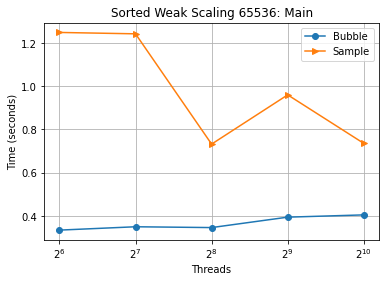

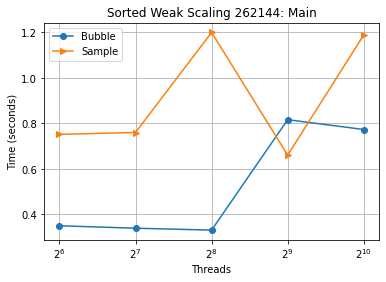

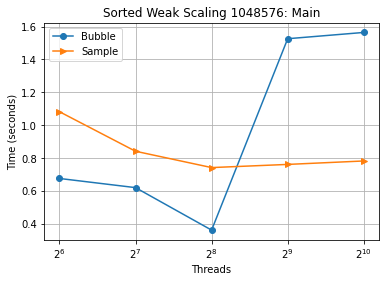

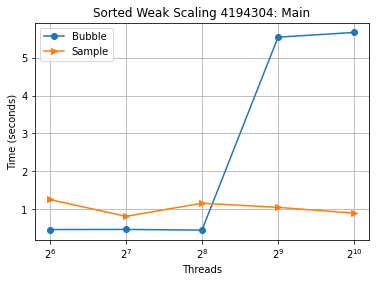

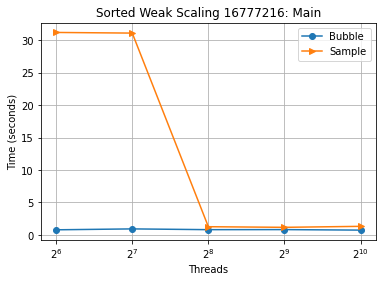

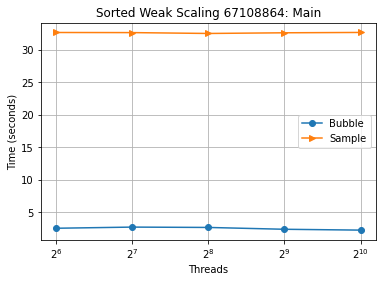

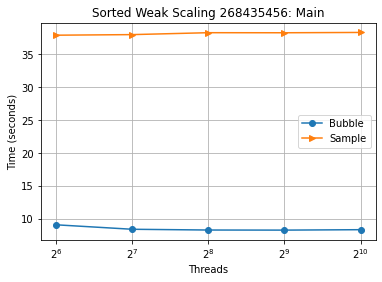

In [230]:
i = 0
for ctk in allctk:
    plot_mpl2(
        df=ctk.dataframe[[temp[0]]].loc["main"],
        df1= ctk.dataframe[[temp[1]]].loc["main"],
        title=f"Sorted Weak Scaling {sizes[i]}: Main",
        xlabel="Threads",
        ylabel="Time (seconds)",
        label1='Bubble',
        label2='Sample'
    )
    i += 1

# Plot of 2

In [231]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["main"],
#         df1= ctk.dataframe[[temp[2]]].loc["main"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Main",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comp_Large Graphs (for 3 then 2)

In [232]:
# i = 0
# for ctk in allctk:
#     plot_mpl3(
#         df=ctk.dataframe[[temp[0]]].loc["comp_large"],
#         df1= ctk.dataframe[[temp[1]]].loc["comp_large"],
#         df2= ctk.dataframe[[temp[2]]].loc["comp_large"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Comp Large",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Bubble',
#         label2='Sample',
#         label3='Merge'
#     )
#     i += 1

In [233]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["comp_large"],
#         df1= ctk.dataframe[[temp[2]]].loc["comp_large"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Comp Large",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comm Graphs (for 3 then 2)

In [234]:
# i = 0
# for ctk in allctk:
#     plot_mpl3(
#         df=ctk.dataframe[[temp[0]]].loc["comm"],
#         df1= ctk.dataframe[[temp[1]]].loc["comm"],
#         df2= ctk.dataframe[[temp[2]]].loc["comm"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Comm",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Bubble',
#         label2='Sample',
#         label3='Merge'
#     )
#     i += 1

In [235]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["comm"],
#         df1= ctk.dataframe[[temp[2]]].loc["comm"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Comm",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

In [236]:

#print (ctk.dataframe)
ctk = allctk[0]
temp = ctk.dataframe
temp = temp.loc[['main', 'comm', 'comp']]
temp.columns = temp.columns.droplevel(level=1)
#print(temp)
#print(temp.reset_index().drop("num_procs", axis=1).set_index("name"))
temp = temp.reset_index()
#print(temp.reset_index())
#print(temp.loc[num_procs==2])
divide_df = temp[temp['num_threads'] == 64]
temp = temp.reset_index().drop("num_threads", axis=1).drop("index", axis=1).set_index("name")
divide_df = divide_df.reset_index().drop("num_threads", axis=1).drop("index", axis=1).set_index("name")
print(divide_df)
print(temp)
#speedup_df = temp.reset_index().drop("num_procs", axis=1).set_index("name")
speedup_df = divide_df/temp
print(speedup_df)

      BitonicSort  SampleSort
name                         
main     0.334188    1.248635
comm     0.000419    0.621906
comp     0.002812    0.000695
      BitonicSort  SampleSort
name                         
main     0.334188    1.248635
main     0.349715    1.242247
main     0.345924    0.732062
main     0.394135    0.959893
main     0.404631    0.735487
comm     0.000419    0.621906
comm     0.000429    0.611629
comm     0.000444    0.386126
comm     0.000394    0.573895
comm     0.000403    0.353302
comp     0.002812    0.000695
comp     0.002878    0.002070
comp     0.002996    0.005838
comp     0.002221    0.017670
comp     0.002265    0.056961
      BitonicSort  SampleSort
name                         
comm     1.000000    1.000000
comm     0.976690    1.016803
comm     0.943694    1.610630
comm     1.063452    1.083658
comm     1.039702    1.760267
comp     1.000000    1.000000
comp     0.977067    0.335749
comp     0.938585    0.119048
comp     1.266096    0.039332
comp     1

In [237]:
function_names = ['main', 'comm', 'comp']
xticks = [64, 128, 256, 512, 1024]

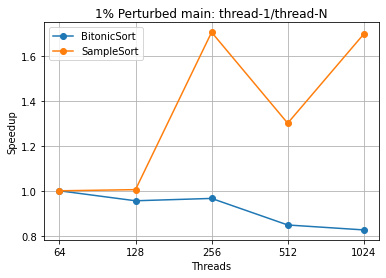

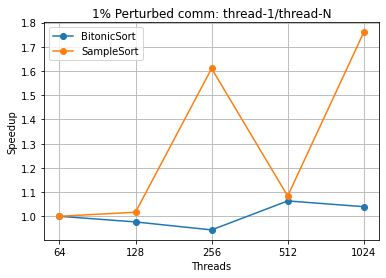

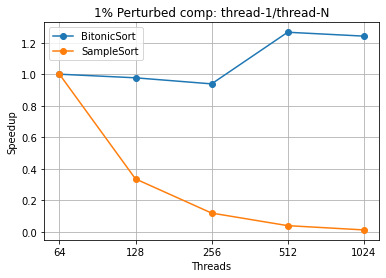

In [238]:
for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"1% Perturbed {name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False,
        xticks = xticks
    )